# 1. Key libraries/packages:

In [34]:
import numpy as np
import itertools
import seaborn as sns
import scipy
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

## Generating Random numbers:

In [4]:
# simulate the outcome of rolling 3 dice, 10k times
ncols = ndice = 3
nrows = nrolls = 10000

rolls = np.random.choice([1, 2, 3, 4, 5, 6],
                        ndice * nrolls).reshape(nrows, ncols)

rolls

#then we can manipulate the data...
wins = rolls.sum(axis=1) > 7
wins.mean()

0.8359

## Scipy Objects
- value -> probability  
   -- pmf: probability at a particular value of random variable (only for discrete distributions!)  
    -- pdf: probability at a particular value of random variable (for continuous distributions)  
   -- cdf: cumulative probablity for less than or equal to value of random variable   
   -- sf:  probability for a random variable **greater than** certain value
- probability -> value  
   -- ppf: less than or equal to a point 
   -- isf: greater than a point  
- rvs for random values 

# 2. Measuring Probability Distributions (high level view of our sample data):

In [20]:
#random discrete variable:
die_distribution = stats.randint(1,7)
die_distribution.rvs((5,6)) #rows, then columns

array([[6, 3, 2, 5, 5, 5],
       [2, 5, 1, 2, 2, 4],
       [3, 1, 6, 6, 1, 1],
       [4, 3, 4, 1, 4, 4],
       [2, 6, 4, 5, 6, 2]])

### Distribution: Descriptive methods

In [21]:
#what's the probability we will roll a 3? (PMF/PDF)
die_distribution.pmf(3) #likelihood of instantnaeous probability

0.16666666666666666

In [22]:
#what's the proabability we will roll a 3 or higher? (SF)
die_distribution.sf(2) #sf is exclusive, prob above given number

0.6666666666666667

In [23]:
#what's the value we will roll higher than, 0.666667 of time? (ISF)
die_distribution.isf(0.666667)

2.0

In [24]:
#what's the probability we will roll a 3 or lower? (CDF)
die_distribution.cdf(3) #cumulative probability at 3 or lower

0.5

In [25]:
#given probability of 0.5, what is the number we will roll or lower? (PPF)
die_distribution.ppf(0.5)

3.0

### A. Uniform Distribution

#### The distribution where we have:
- an equal likelihood of all outcomes (fair 6 sided dice)
- need: number of outcomes (6), probability (1/n)

(array([   0., 1689., 1688., 1686., 1653., 1697., 1587.,    0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <BarContainer object of 8 artists>)

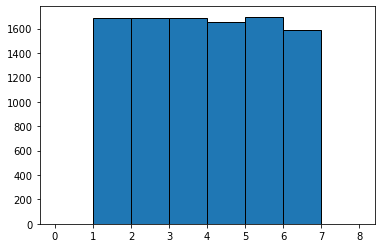

In [26]:
n = 10000
x = die_distribution.rvs(n)

plt.hist(x, bins=range(0,9), edgecolor='black')

### B. Binomial Distribituion

### The distribution when we have:
- a known number of trials
- a binary outcome (success/failure) >> discrete variable
- need: number of trials, p(success)

In [31]:
# formula:
n_trials = 30
p_success = 0.25
stats.binom(n_trials, p_success)
# probability of success in >10 trials?
stats.binom(n_trials, p_success).sf(10)

0.10572812269266013

In [32]:
stats.binom(n_trials, p_success).hist()

AttributeError: 'rv_frozen' object has no attribute 'hist'

# Testing for a Relationship between variables:

### Which type of Statistical Test do we use?

The two Variables are:

- **Continuous + Categorical:** **t-test**
    - one sample
    - one tailed: measuring directionality (divide p in half)
    - two tailed: measuring difference (p is the correct value)
- **Continuous + Continuous:** **pearson-r**
- **Categorical + Categorical:** **chi2**
    


## Measures/Tests of Distribution
- central limit theorem
- t-test
    - one sample
        - one tailed: measuring directionality (divide p in half)
            >>
        - two tailed: measuring difference (p is the correct value)
            >>
    - two sample

## Measures of Correlation
- Pearson r-test
    - measures correlation between two variables, in units of "r". But the measure is unitless, inherently
    - only tests Linear relationships
        >> **r, p = stats.pearson(x,y)**
            - where r is correlation, p is probability that relationship is due to chance
            - conceptually: the confidence interval above and below the line of best fit. +/- implies relationship
    